In [1]:
import pandas as pd
import targeter

(CVXPY) Jun 20 04:49:04 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 20 04:49:04 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:

data_url = "/hackdata/share/_tmp/adult.csv"
adult = pd.read_csv(data_url)
adult


,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [3]:
adult['tmp' ]=adult.apply(lambda X: '>50K' if X.ABOVE50K == 1  else '<50K', axis = 1)
adult

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K,tmp
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,<50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,<50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,<50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,<50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,<50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,<50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,<50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,<50K


In [4]:
from targeter import Targeter
tar = Targeter(data=adult, target='tmp')

the reference level has been defined as:>50K


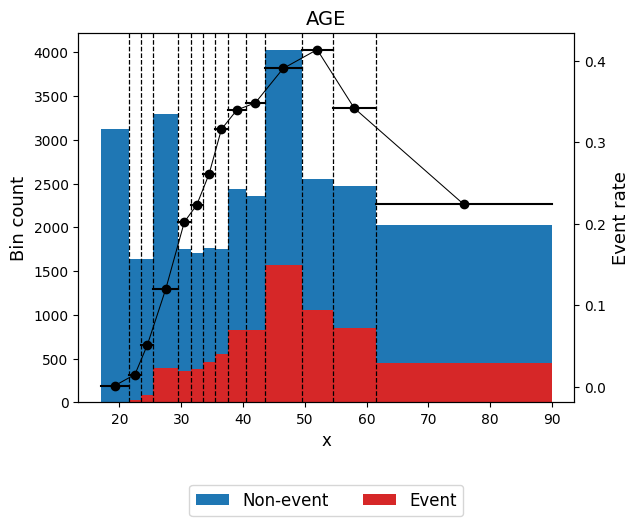

In [5]:
tar.plot('AGE')


In [6]:
tar.get_binned_variable('AGE').binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 21.50)",3130,0.096127,3125,5,0.001597,5.289505,0.665304,0.042027
1,"[21.50, 23.50)",1642,0.050428,1617,25,0.015225,3.021206,0.187992,0.017327
2,"[23.50, 25.50)",1639,0.050336,1555,84,0.051251,1.770168,0.092388,0.010243
3,"[25.50, 29.50)",3300,0.101348,2903,397,0.120303,0.841317,0.056203,0.006825
4,"[29.50, 31.50)",1749,0.053715,1395,354,0.202401,0.223107,0.002518,0.000314
5,"[31.50, 33.50)",1703,0.052302,1323,380,0.223136,0.09924,0.000502,0.000063
6,"[33.50, 35.50)",1762,0.054114,1302,460,0.261067,-0.107816,0.000646,0.000081
7,"[35.50, 37.50)",1756,0.053930,1201,555,0.316059,-0.376305,0.008353,0.001038
8,"[37.50, 40.50)",2437,0.074844,1609,828,0.339762,-0.483891,0.019602,0.002427
9,"[40.50, 43.50)",2358,0.072418,1536,822,0.348601,-0.52305,0.022333,0.002760


In [7]:
tar.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,AGE,numerical,OPTIMAL,True,14,1.207969,0.101723,0.425356,0.016125
1,WORKCLASS,categorical,OPTIMAL,True,5,0.152814,0.018384,0.165456,0.254219
2,FNLWGT,numerical,OPTIMAL,True,6,0.007014,0.000875,0.036632,0.008464
3,EDUCATION,categorical,OPTIMAL,True,7,0.724232,0.083571,0.432671,0.502416
4,EDUCATIONNUM,numerical,OPTIMAL,True,7,0.722082,0.083426,0.432444,0.400851
5,MARITALSTATUS,categorical,OPTIMAL,True,3,1.334507,0.153198,0.537431,0.014769
6,OCCUPATION,categorical,OPTIMAL,True,8,0.749516,0.087156,0.455559,0.32385
7,RELATIONSHIP,categorical,OPTIMAL,True,4,1.510271,0.163376,0.555265,0.00355
8,RACE,categorical,OPTIMAL,True,2,0.068563,0.008351,0.074661,0.075685
9,SEX,categorical,OPTIMAL,True,2,0.303289,0.036858,0.237662,0.556085


In [8]:
tar.data

'_3'